# Weighted ECM clustering
## Toys dataset - 2 clusters, 6 dimensions


In [3]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_outlier import wecm
from evclust.utils import ev_plot, ev_pcaplot, calculate_non_specificity, plotting
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_2c6d_dataset

          0         1         2         3         4         5
0  3.178499  2.554288  1.210410  2.747790 -0.185761  0.533775
1  0.223248  2.606554 -0.669845 -3.047209  4.858650  0.967867
2  0.570278 -0.831117 -1.704321  0.561818  0.178342  0.884180
3  1.393925  0.676908  1.102410 -2.709991 -0.611678  1.199641
4  2.329831 -3.047742 -1.956628  6.087984 -2.378940  1.282781


D:\vtdo\projects\evclust\src\evclust\utils.py:1089: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


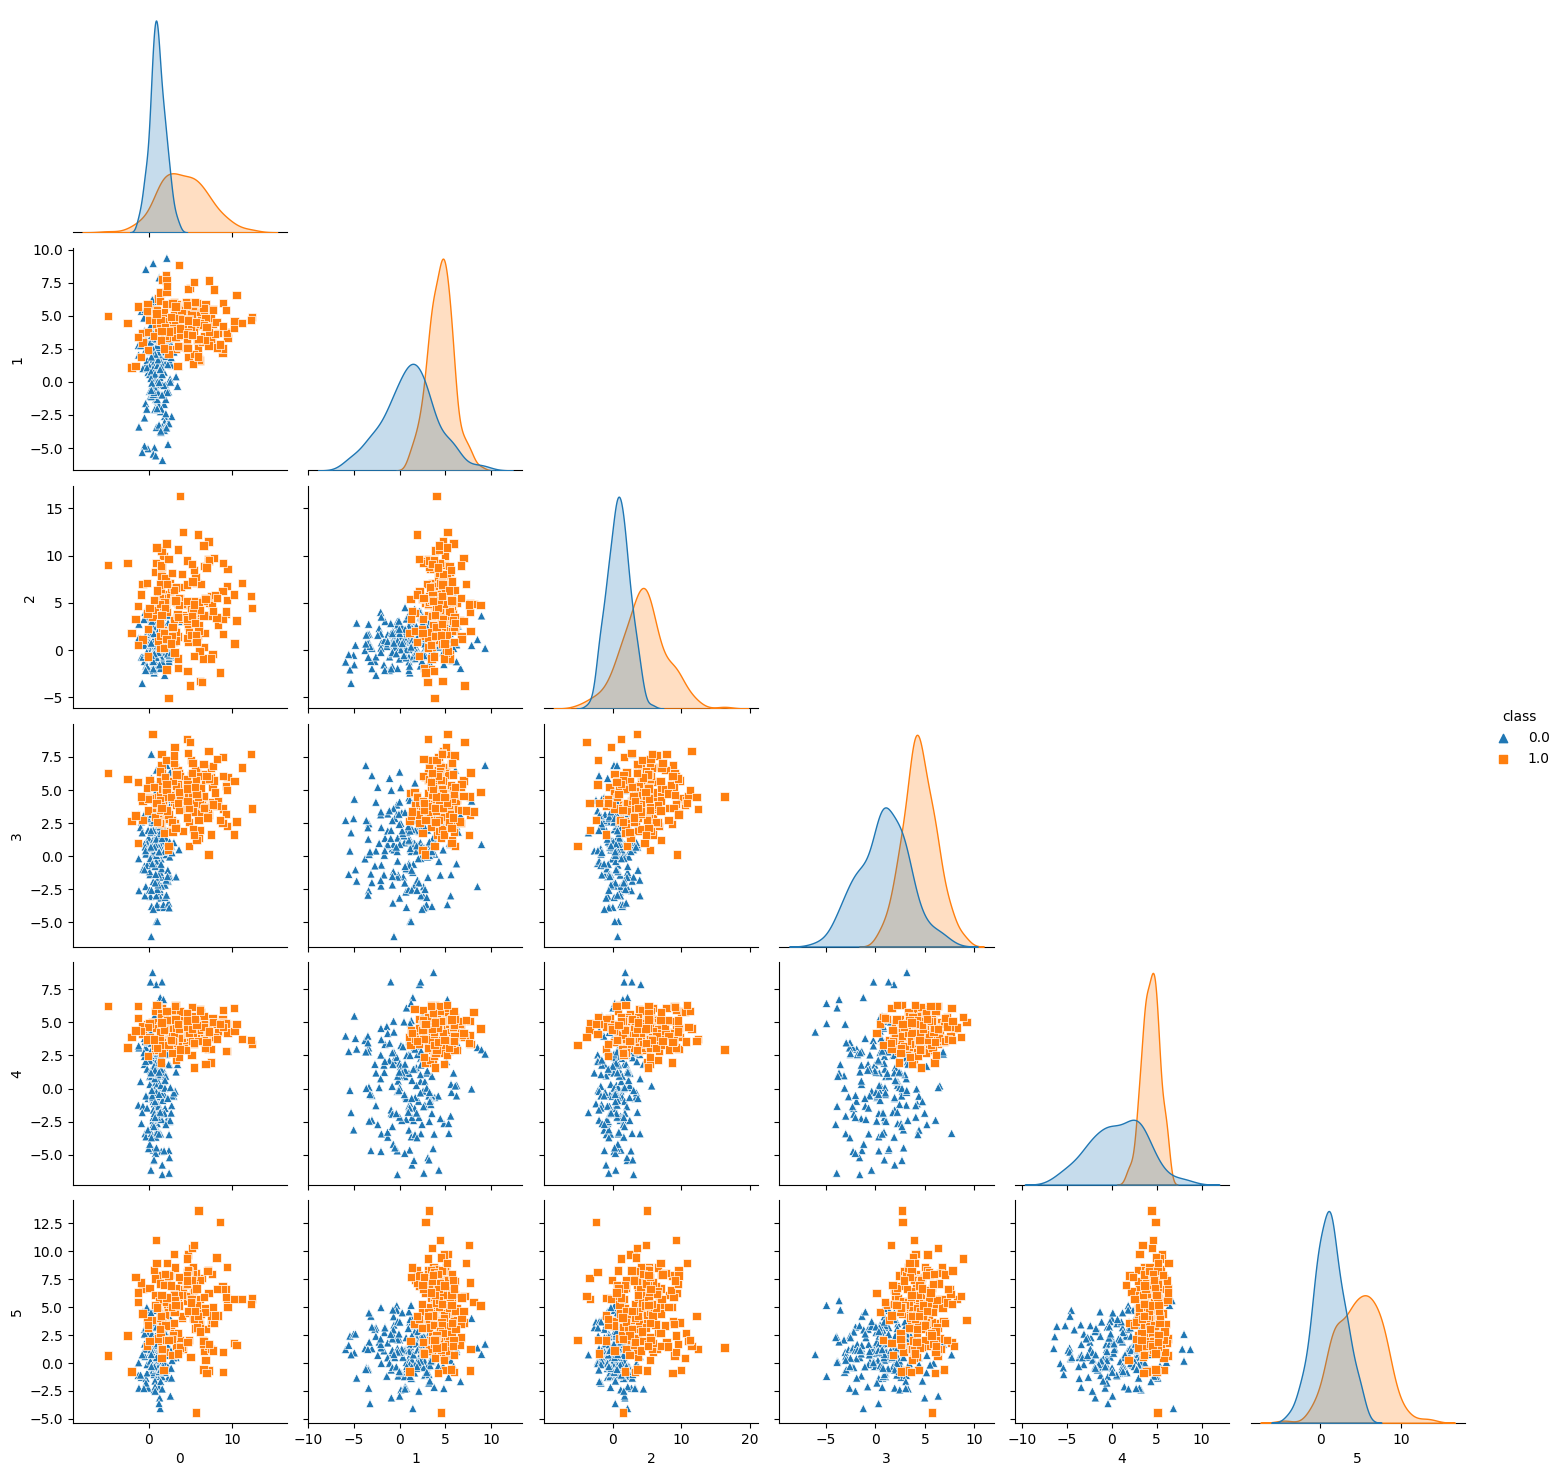

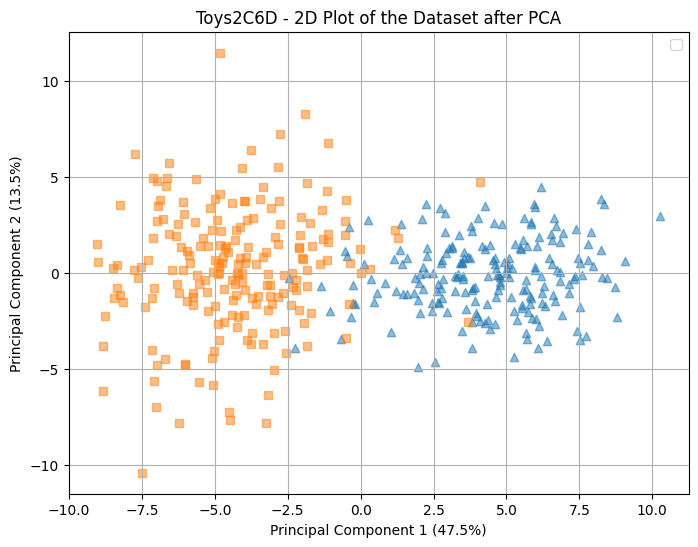

In [4]:
## Generating data set
df_wt_label = load_2c6d_dataset()
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1]) 

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C6D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [5]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [25.673420729452904, 25.673420729452904, 25.673420729452904, 25.673420729452904, 25.673438656958723, 25.673438656958723, 25.673438656958723, 25.673438656958723, 25.673438656958723, 25.673438656958723]
ARI values: [0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262, 0.8368177498618262]
NS values: [0.9612374653484044, 1.0022262415871395, 1.0022262415871395, 1.0022262415871395, 0.961192803426894, 0.961192803426894, 1.0022944187067029, 0.961192803426894, 0.961192803426894, 1.0022944187067029]
NMI values: [0.765565243893178, 0.7655652438931781, 0.7655652438931781, 0.7655652438931781, 0.765565243893178, 0.765565243893178, 0.7655652438931781, 0.765565243893178, 0.765565243893178, 0.7655652438931781]
Average ARI values: 0.8368177498618262
Average Non-specificity: 0.9817276241230803
Average Normalized mutual infor: 0.7655652438931781
Center: [[0.51477041 0.67

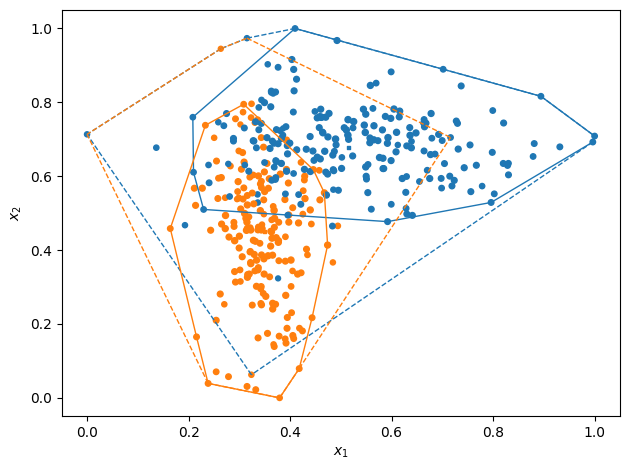

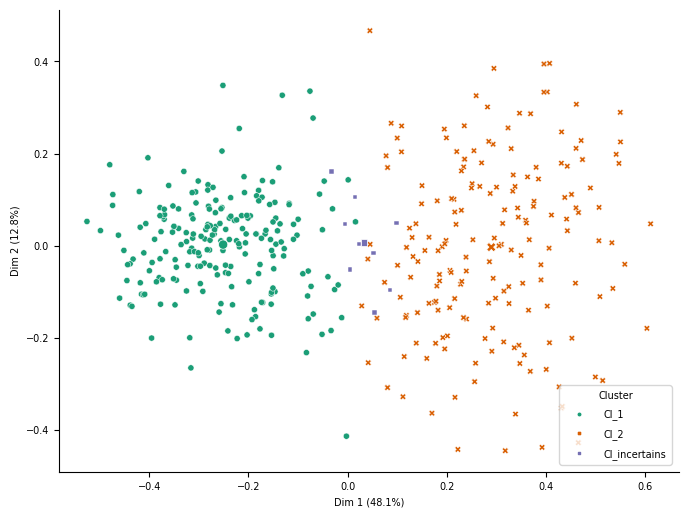

In [6]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

## Weighted ECM (WECM)

In [7]:
%%capture
model_list = np.array([])
c = 2
d = X.shape[1]
delta = np.sqrt(20)
W = np.ones((c, d)) * (1/d)
for i in range(10):
    model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, stopping_factor="center", init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [0.44062432805381263, 0.4406243280538127, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794, 0.6082019986201794]
ARI values: [0.8833078015652729, 0.8833078015652729, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038, 0.8276702121004038]
NS values: [0.8097055858418568, 0.8723585935622694, 0.9664920598813553, 0.9664920598813553, 1.011614756108211, 1.011614756108211, 0.9664920598813553, 0.9664920598813553, 0.9664920598813553, 1.011614756108211]
NMI values: [0.811051129676766, 0.8110511296767662, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332, 0.7563140705007332]
Average ARI values: 0.8387977299933776
Average Non-specificity: 0.9549368747135535
Average Normalized mutual infor: 0.7672614823359397


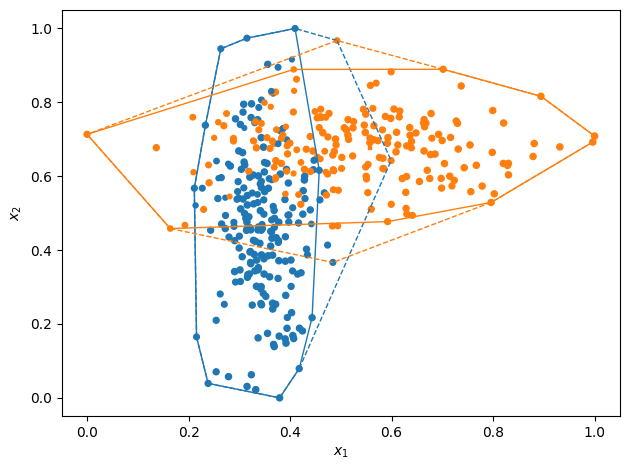

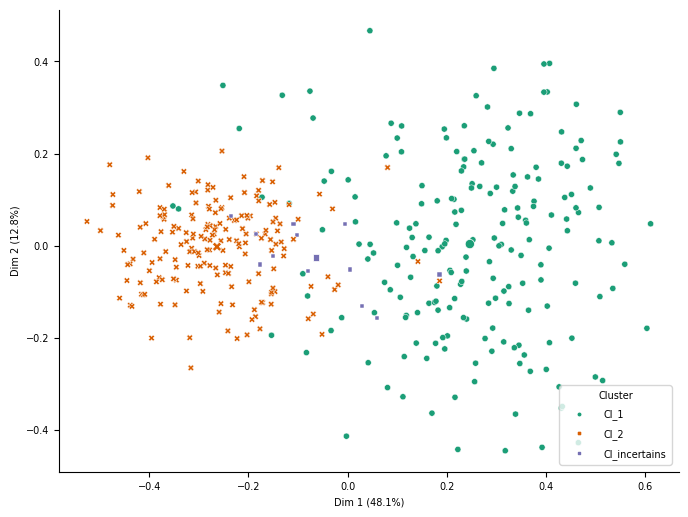

In [8]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

In [9]:
top_weights = [model['W'] for model in model_list]
for W in top_weights:
    print(f"\n{W}")


[[0.49127152 0.03606785 0.26518586 0.04790731 0.02786349 0.13170397]
 [0.0512606  0.236728   0.06770918 0.14771655 0.4322175  0.06436817]]

[[0.0512606  0.236728   0.06770918 0.14771655 0.4322175  0.06436817]
 [0.49127152 0.03606785 0.26518586 0.04790731 0.02786349 0.13170397]]

[[0.11253509 0.20051824 0.14304303 0.17287826 0.24628802 0.12473737]
 [0.29092362 0.08609041 0.25765907 0.10262733 0.066084   0.19661558]]

[[0.11253509 0.20051824 0.14304303 0.17287826 0.24628802 0.12473737]
 [0.29092362 0.08609041 0.25765907 0.10262733 0.066084   0.19661558]]

[[0.29092362 0.08609041 0.25765907 0.10262733 0.066084   0.19661558]
 [0.11253509 0.20051824 0.14304303 0.17287826 0.24628802 0.12473737]]

[[0.29092362 0.08609041 0.25765907 0.10262733 0.066084   0.19661558]
 [0.11253509 0.20051824 0.14304303 0.17287826 0.24628802 0.12473737]]

[[0.11253509 0.20051824 0.14304303 0.17287826 0.24628802 0.12473737]
 [0.29092362 0.08609041 0.25765907 0.10262733 0.066084   0.19661558]]

[[0.11253509 0.2005